**f(x) = 0.6x^3+5.5x^2+10x - 5

In [14]:
def sign(x):  
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0


def dicho(f, a, b, eps=1.0e-14):  
    fa = f(a)                              
    fb = f(b)
    while True:
        c = 0.5*(a+b)
        if abs(b-a) < eps:
            return c
        fc = f(c)
        if abs(fc) <= eps:
            return c
        if sign(fa)*sign(fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc


def div_poly(p, a):  
    r = [0, 0, 0]          
    r[2] = p[3]
    r[1] = p[2]+a*p[3]
    r[0] = (p[1]+a*(p[2]+a*p[3]))
    return tuple(r)


def solve_qube(p):  
    q = max(p)
    left = -abs(q)/abs(p[3])  
    right = -left
    x1 = dicho(lambda x: p[3]*x**3+p[2]*x**2+p[1]*x+p[0], left, right)
    (c, b, a) = div_poly(p, x1)
    d = b**2-4*a*c
    x2 = (-b+d**0.5)/(2*a)
    x3 = (-b-d**0.5)/(2*a)
    x1 = round(x1, 3)
    x2 = round(x2, 3)
    x3 = round(x3, 3)
    
    return (x1, x2, x3)


print(solve_qube([0.6, 5.5, 10, -5]))

(2.0, -1.049, 1.049)


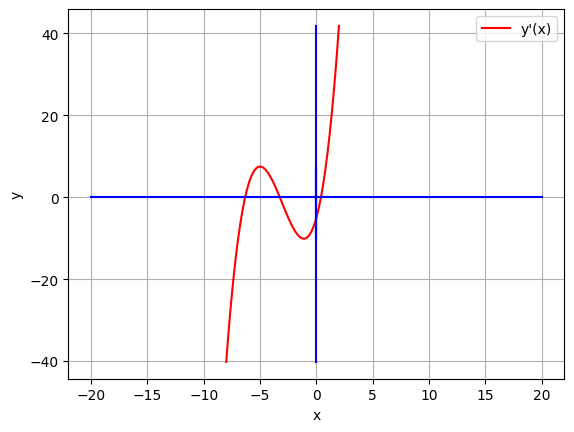

In [35]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-8, 2, 50)
y = 0.6*x**3 + 5.5*x**2 + 10*x - 5
fig, ax = plt.subplots()
ax.plot(x, y, color='red', label="y'(x)")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.plot(np.linspace(-20, 20, 50), x*0, color='blue')
ax.plot(y*0, 0.6*x**3 + 5.5*x**2 + 10*x - 5, color='blue')
plt.grid(True)
plt.show()

In [38]:
from sympy import *

x, y = symbols('x y')
xfromy = diff(0.6*x**3 + 5.5*x**2 + 10*x - 5)
sec_der = diff(xfromy)
t = str((sec_der).as_independent())
lst = []
for i in range(len(t)):
    lst.append(t[i])

new_lst = []
for i in range(len(lst)):
    if lst[i] not in '(),*x':
        new_lst.append(lst[i])

lst_nums = []

try:
    while True:
        new_lst.remove(' ')
except ValueError:
    pass

for i in range(len(new_lst)):
    try:
        lst_nums.append(int(new_lst[i]))
    except ValueError:
        lst_nums.append(new_lst[i])
new_str = ''.join(new_lst)
perem = new_str.split('+')
x_dot = round(float(perem[1]) / float(perem[0]), 2)
y_dot = round(0.6*x_dot**3 + 5.5*x_dot**2 + 10*x_dot - 5, 2)
print(x_dot, y_dot)



3.06 94.29
Функция убывает от (-inf;3.06) и возрастает от (3.06;+inf)


In [63]:
import math
from sympy import symbols, diff

x, y = symbols('x y')
der = diff(0.6*x**3 + 5.5*x**2 + 10*x - 5)
print(der)
a = 1.8
b = 11
c = 10
discr = b ** 2 - 4 * a * c
if discr > 0:
    x1 = (-b + math.sqrt(discr)) / (2 * a)
    x2 = (-b - math.sqrt(discr)) / (2 * a)
    print(f"x1 = {x1} \nx2 = {x2}")
elif discr == 0:
    x = -b / (2 * a)
    print("x = %.2f" % x)
else:
    print("Корней нет")
x1 = int(x1)
x2 = int(x2)

y1 = 0.6*x1**3 + 5.5*x1**2 + 10*x1 - 5
y2 = 0.6*x2**3 + 5.5*x2**2 + 10*x2 - 5
print(f'Первая точка перегиба ({x1}, {y1})'
     f'\n Вторая точка перегиба ({x2}, {y2})')
print(f'Функция возрастает от (-inf;{x2}) and ({x1}; +inf)'
     f'\nФункция убывает от ({x2}, {x1}) and ({x1}, +inf)')
!git branch -M main


1.8*x**2 + 11.0*x + 10
x1 = -1.1111111111111112 
x2 = -5.0
Первая точка перегиба (-1, -10.1)
 Вторая точка перегиба (-5, 7.5)
Функция возрастает от (-inf;-5) and (-1; +inf)
Функция убывает от (-5, -1) and (-1, +inf)
